# Abstract

Manipulation is an engineering process that deliberately achieves a specific goal. Online fake
news is a specific type of digital misi information that poses serious threats to democratic
institutions, misguidesthe public, manipulation and can lead to radicalization and violence. The
prevalence of online media and the opportunity for users to express opinions in comments
magnifies the problem. Based on data taken from kaggle, 2020. Fake news is more than real
news. 

According to Werme (2016), what hoaxes are fake news that people rely on and have a certain
political agenda. Hoaks is not just misleading alias misleading, information in fake news is also
no factual basis, but there is as if a series of facts. Based on problem, the resolution of the
problem that will be the data again is private. Then, if there is unverified personal data will be
indicated.

In conclusion, fake news is fake news that is not based on chewyness. The risk of fake news
can be a riot, and troubling for the community. Therefore, it is made detecting fake
manipulation news.

# Data Exploration

In [1]:
# load libraries
import os 
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
for dirname, _, filenames in os.walk('D:/project_py_web/FREELANCER/Fake News Detection_/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/project_py_web/FREELANCER/Fake News Detection_/Detecting Manipulation Fake News.pdf
D:/project_py_web/FREELANCER/Fake News Detection_/test.csv
D:/project_py_web/FREELANCER/Fake News Detection_/train.csv


In [45]:
# load dataset 
data = pd.read_csv("train.csv")

In [51]:
data.sample(10)

,id,title,author,text,label
6431,6431,"10 radikale Vorhaben, die Donald Trump sofort ...",noreply@blogger.com (Der Postillon),"Donnerstag, 10. November 2016 10 radikale Vorh...",1
16335,16335,Facebook Said to Create Censorship Tool to Get...,Mike Isaac,"SAN FRANCISCO — Mark Zuckerberg, Facebook’s...",0
3698,3698,Justice Department Faces Uphill Battle Should ...,Henry Wolff,"Loading Posted on October 26, 2016 Justice Dep...",1
11798,11798,"In the New Hollywood, Sumner Redstone Is a Man...",Laura M. Holson,"This is a town built on stories, the more sala...",0
2264,2264,Priebus on Immigration Ban: ’Perhaps We Need t...,Pam Key,"Sunday on CBS’s “Face The Nation,” while discu...",0
774,774,Концепция записка российского председательства,voltairenet.org,Заседание Совета Безопасности от 28 октября 20...,1
9390,9390,Aid Agencies in Iraq Brace for Exodus as Civil...,Jason Ditz,First Civilians From Surrounding Towns Arrive ...,1
8206,8206,Yandex Email Account Proves DNC Hacker Was NOT...,NaN,Taming the corporate media beast Yandex Email ...,1
5796,5796,Why Every Man Must Take Control Of His Finances,Jon Anthony,Why Every Man Must Take Control Of His Finance...,1
3122,3122,Directors From Sundance on What Happened Next ...,Melena Ryzik,"It’s almost a coronation: Every year, the Sund...",0


In [52]:
# info & statistic of our dataset
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [53]:
# info & statistic of our dataset
data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [54]:
# check if out data containt Nan values
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [55]:
# lets fill our nan values with "" because this data its string type
data = data.fillna("")

In [56]:
# check if out data containt Nan values
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [118]:
# generate 5 row of sample in our training dataset
data.sample(5)

,id,title,author,text,label
19404,19404,Water Protectors Face Off With Police #NoDAPL,Activist Post,By MintPressNews Mint Press News reporter Derr...,1
19086,19086,How to Close a Gender Gap: Let Employees Contr...,Claire Cain Miller,The main reason for the gender gaps at work —...,0
19413,19413,TRUNEWS 11/04/16 Spirit Cooking: Will America ...,,TRUNEWS 11/04/16 Spirit Cooking: Will America ...,1
9725,9725,Syria and Russia Appear Ready to Scorch Aleppo...,Anne Barnard and Somini Sengupta,"BEIRUT, Lebanon — Make life intolerable and...",0
18600,18600,Donald Trump: ’I Didn’t Get Elected to Serve t...,Charlie Spiering,President Donald Trump defied media coverage o...,0


# Visualization

In [119]:
%matplotlib inline

In [120]:
# visualize label in pie chart
unrealiable = len(data[data["label"]==1])
reliable = len(data[data["label"]==0])

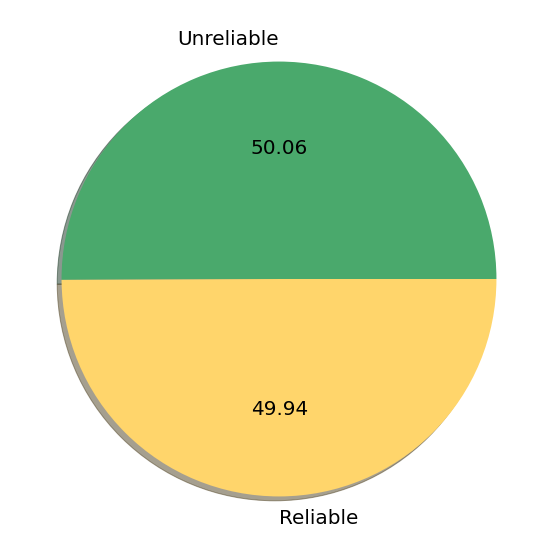

In [121]:
y = np.array([unrealiable,reliable])
mylabels = ['Unreliable','Reliable']
plt.figure(figsize=(10,10))
plt.pie(y,labels=mylabels,colors=["#4aa96c","#ffd56b"],autopct='%.2f', shadow=True, textprops={'fontsize': 20})
plt.show()

In [122]:
# add new columns from length our text per row
data['len_text'] = data['text'].apply(lambda x : len(x))

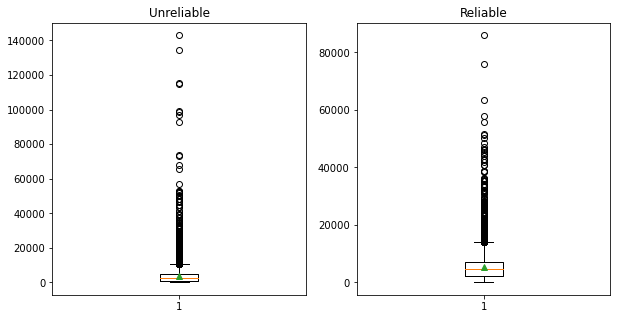

In [123]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.boxplot(data[data['label']==1]['len_text'], showmeans=True, autorange=True)
ax1.set_title('Unreliable')
ax2.boxplot(data[data['label']==0]['len_text'], showmeans=True, autorange=True)
ax2.set_title('Reliable');

We observe that Unreliable news generally includes less words than Reliable !

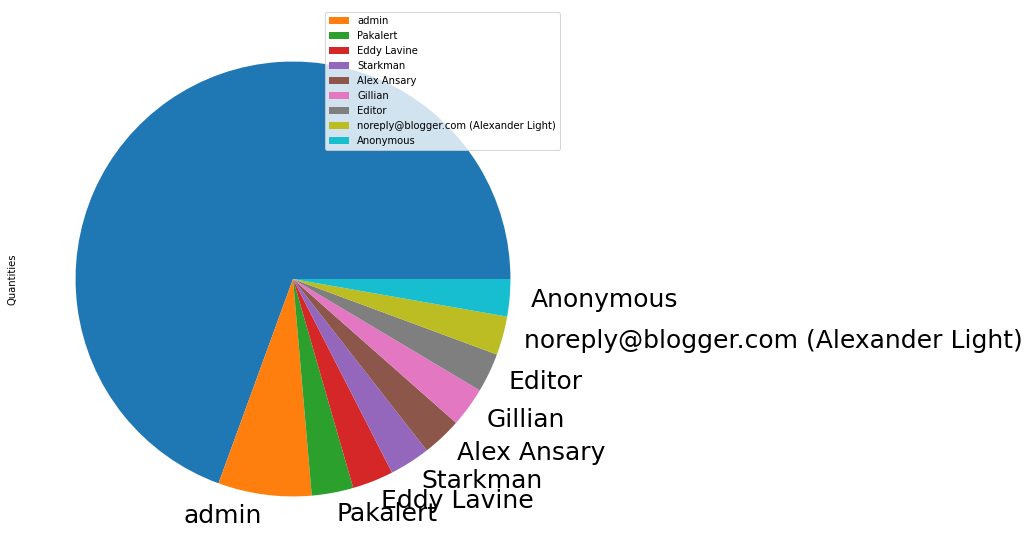

In [62]:
unreliable_author = pd.DataFrame({'Author':data[data['label']==1]['author'].value_counts().head(10).index,'Quantities':data[data['label']==1]['author'].value_counts().head(10)})
unreliable_author.plot(kind='pie',x='Author',y='Quantities', figsize=(10,10), fontsize=25)
plt.legend(fontsize=10);

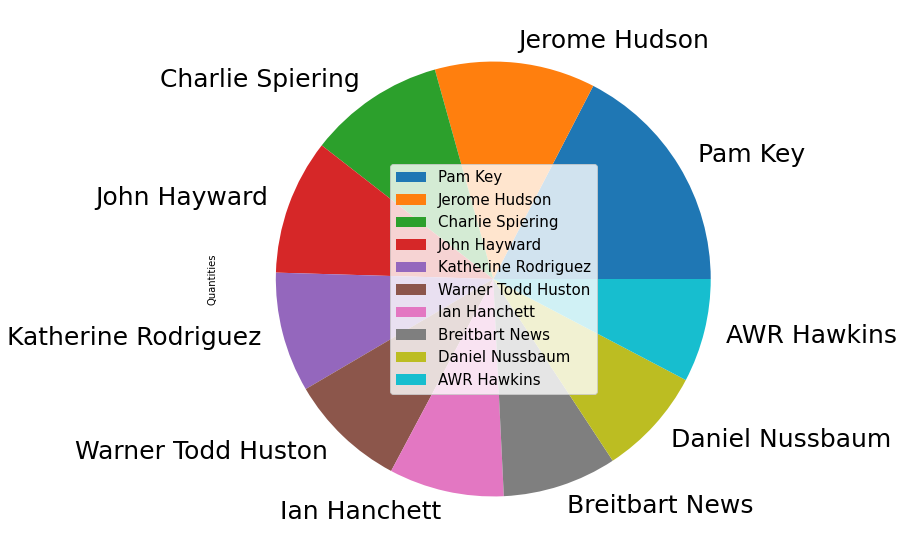

In [65]:
reliable_author = pd.DataFrame({'Author':data[data['label']==0]['author'].value_counts().head(10).index,'Quantities':data[data['label']==0]['author'].value_counts().head(10)})
reliable_author.plot(kind='pie',x='Author',y='Quantities', figsize=(10,10), fontsize=25)
plt.legend(fontsize=15, loc="center");

We found the Authors who are generally posting Reliable or Unreliable news

In [126]:
df_train['total'] = data['title'] + data['author']

In [128]:
# df_train = data.drop(columns= ['id','title','author','len_text'])

We drop the unnecessary columns from our DataFrame, let start to preprocessing

In [106]:
ps = PorterStemmer()
def preprocess_data(data):
    review = re.sub('[^a-zA-Z]',' ',data) # filtering out miscellaneous text.
    review = review.lower()
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english') and words.isalpha()]
    review = ' '.join(review)
    return review

In [129]:
df_train['clean_total'] = df_train['total'].apply(preprocess_data)

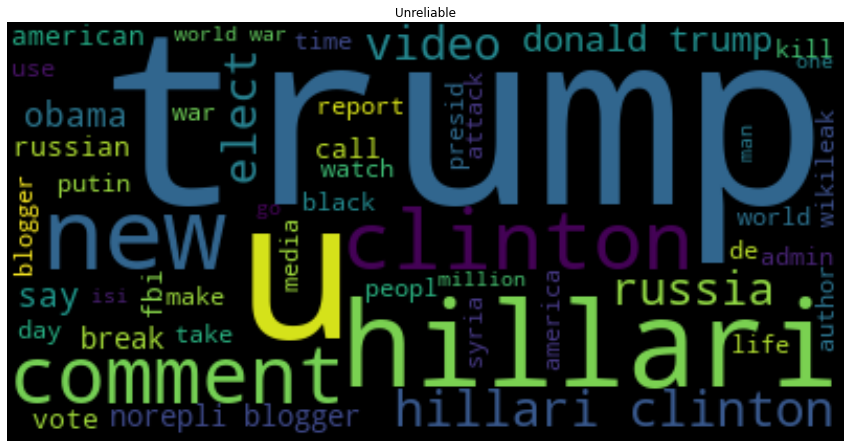

In [130]:
wc = WordCloud(background_color = 'black', max_words=50)
wc.generate(' '.join(df_train[df_train['label']==1]['clean_total']))
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation = 'bilinear')
plt.title('Unreliable')
plt.axis('off')
plt.show()

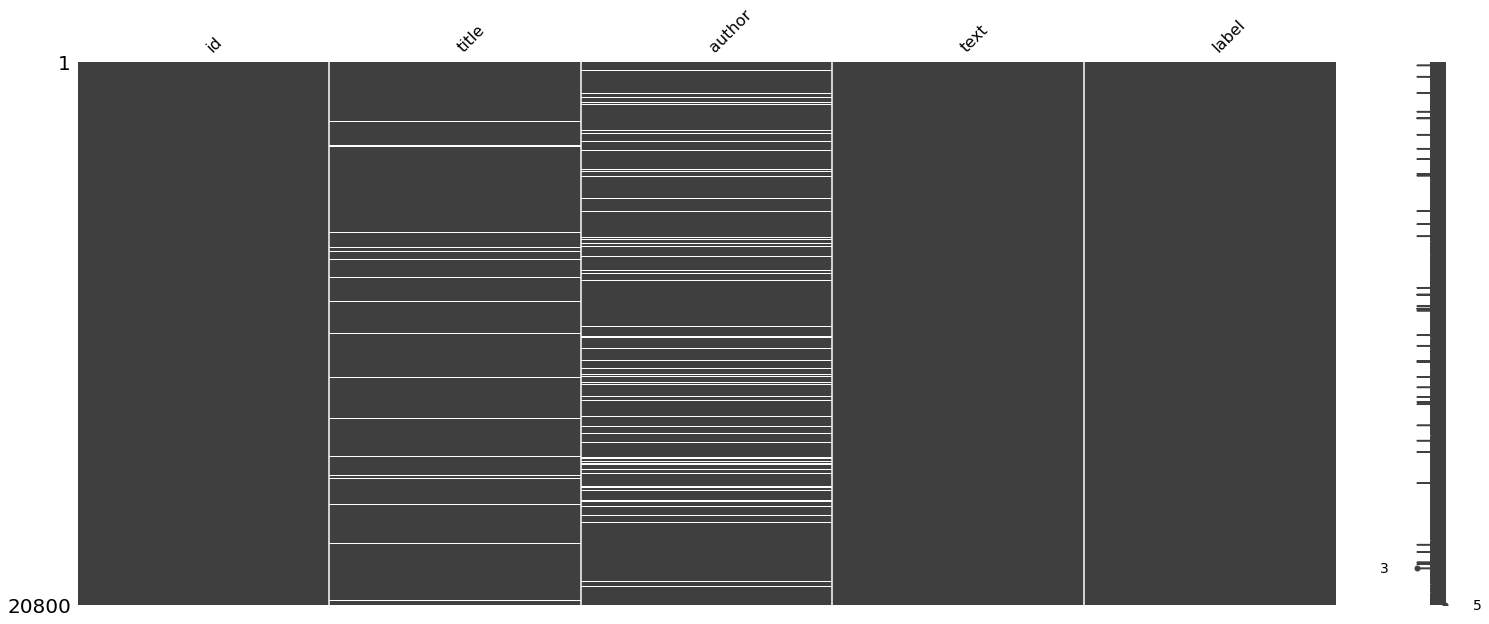

In [8]:
# Viewing all the train data
missingno.matrix(df_train)

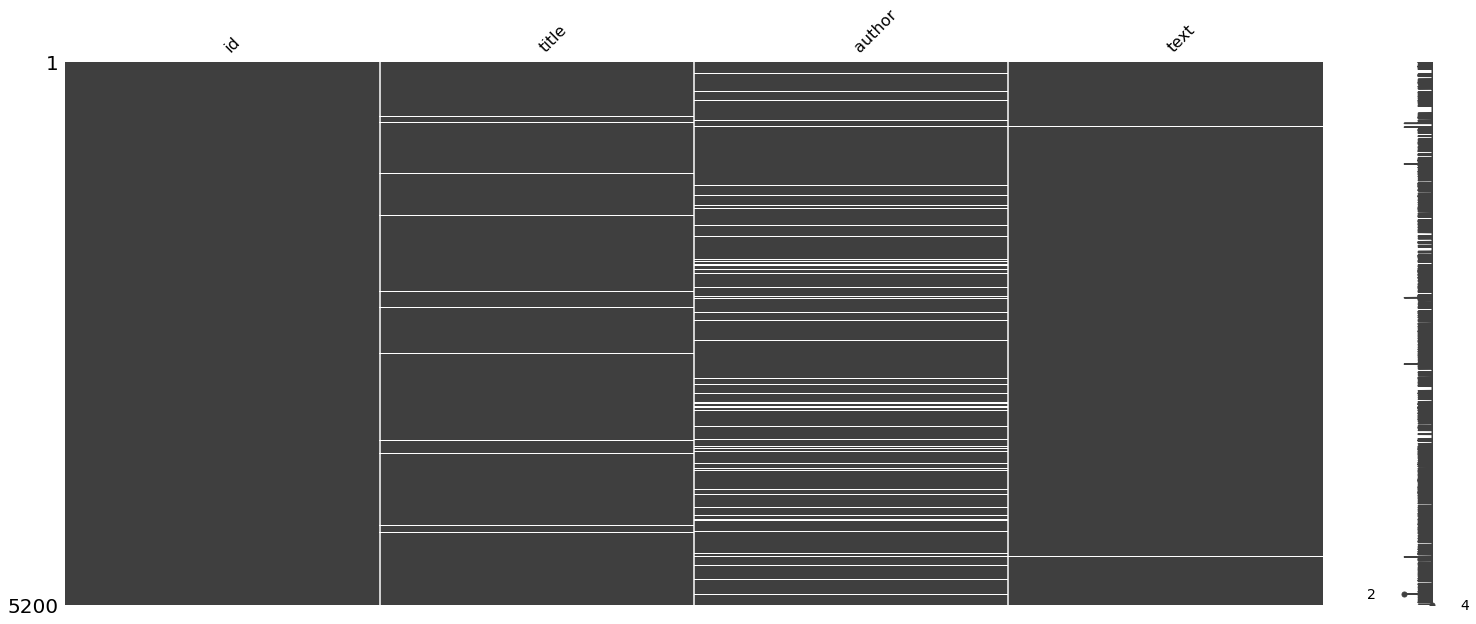

In [9]:
# Viewing all the test data
missingno.matrix(df_test)

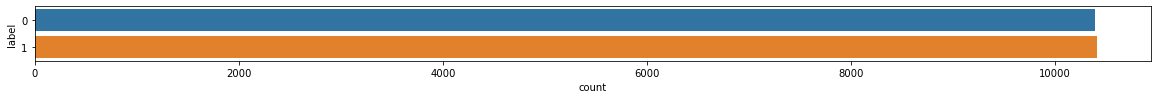

In [10]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="label", data=df_train)

# Data Modeling

In [44]:
# pip install missingno

In [3]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tensorflow.__version__)

2.4.1


In [4]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Reading train and test data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.shape, df_test.shape

((20800, 5), (5200, 4))

In [11]:
df_train.fillna("", inplace=True)

In [12]:
X = df_train.drop("label", axis=1)
y = df_train["label"]

In [13]:
ps = PorterStemmer()
train_titles = []
for i in range(0, len(X)):
    title = re.sub("[^a-zA-Z]", " ", X["title"][i]).lower().split()
    title = [ps.stem(word) for word in title if word not in stopwords.words("english")]
    train_titles.append(" ".join(title))

print(len(train_titles))

20800


In [14]:
# One hot encoding the data
vocab_size = 5000
train_onehot = [one_hot(title, vocab_size) for title in train_titles]

# Padding the sentences
sent_length = 20
embeded_docs = pad_sequences(train_onehot, padding="pre", maxlen=sent_length)

In [15]:
embedding_vector_features = 40

# 1: Building the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 2: Comipling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 262,929
Trainable params: 262,929
Non-trainable params: 0
_________________________________________________________________


In [17]:
# training model
history = model.fit(embeded_docs, y, epochs=10, batch_size=64)

Epoch 1/10
325/325 [==============================] - 27s 62ms/step - loss: 0.3688 - accuracy: 0.8390
Epoch 2/10
325/325 [==============================] - 12s 36ms/step - loss: 0.1280 - accuracy: 0.9514
Epoch 3/10
325/325 [==============================] - 12s 37ms/step - loss: 0.0886 - accuracy: 0.9686
Epoch 4/10
325/325 [==============================] - 12s 38ms/step - loss: 0.0598 - accuracy: 0.9808
Epoch 5/10
325/325 [==============================] - 12s 36ms/step - loss: 0.0417 - accuracy: 0.9858
Epoch 6/10
325/325 [==============================] - 13s 39ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 7/10
325/325 [==============================] - 13s 39ms/step - loss: 0.0204 - accuracy: 0.9939
Epoch 8/10
325/325 [==============================] - 12s 37ms/step - loss: 0.0136 - accuracy: 0.9968
Epoch 9/10
325/325 [==============================] - 12s 37ms/step - loss: 0.0091 - accuracy: 0.9975
Epoch 10/10
325/325 [==============================] - 13s 39ms/step - loss: 0.008

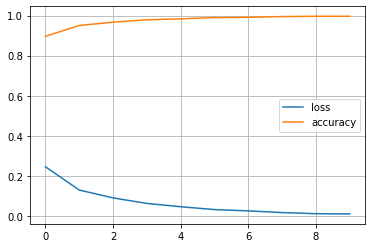

In [66]:
pd.DataFrame(history.history).plot()
plt.grid(True);

In [19]:
# Mean of the accuracy
pd.Series(history.history['accuracy']).mean(), pd.Series(history.history['accuracy']).max()

(0.9744567275047302, 0.9964903593063354)

# Evaluation

In [25]:
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
df_test.fillna("", inplace=True)

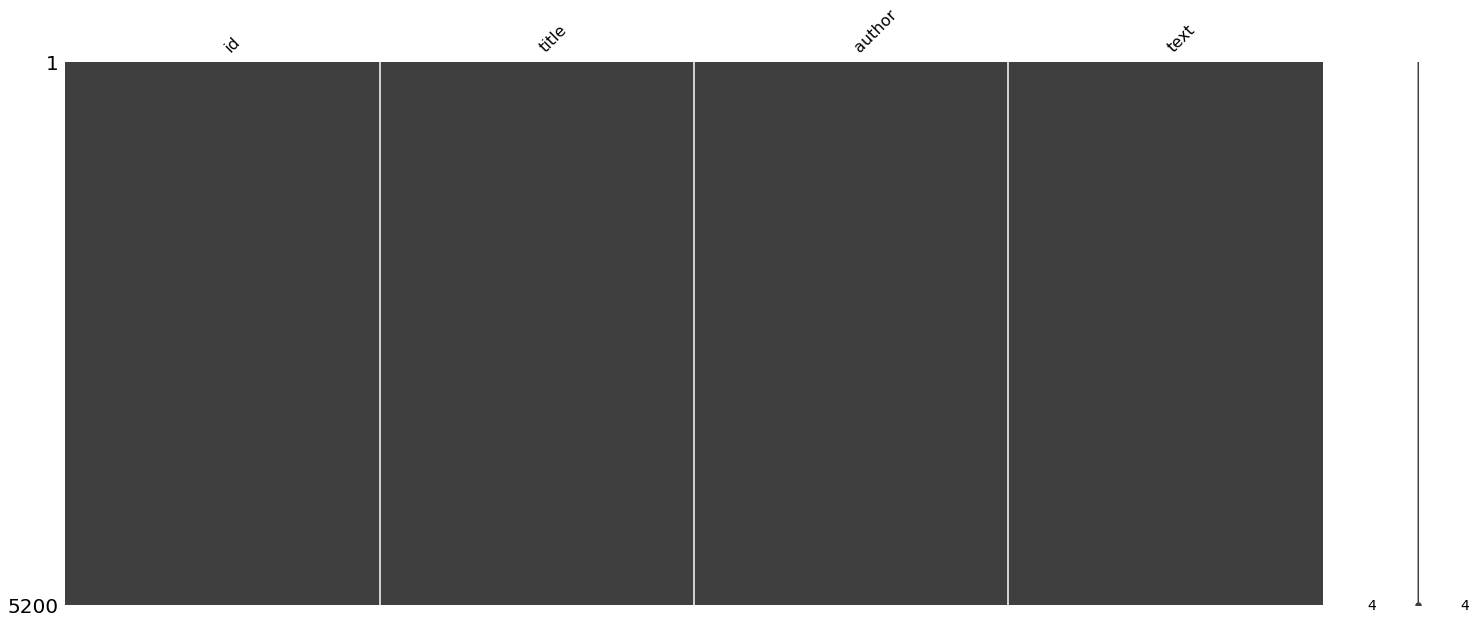

In [21]:
missingno.matrix(df_test)

In [23]:
ps = PorterStemmer()
test_titles = []

for i in tqdm(range(0, len(df_test))):
    title = re.sub("[^a-zA-Z]", " ", df_test["title"][i]).lower().split()
    title = [word for word in title if word not in stopwords.words("english")]
    test_titles.append(" ".join(title))
len(test_titles)

100%|██████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:52<00:00, 99.30it/s]


5200

In [24]:
# One hot encoding the data
vocab_size = 5000
test_onehot = [one_hot(title, vocab_size) for title in test_titles]

# Padding the titles
sent_length = 20
test_embeded_docs = pad_sequences(test_onehot, padding="pre", maxlen=sent_length)

In [26]:
y_pred = model.predict_classes(test_embeded_docs);

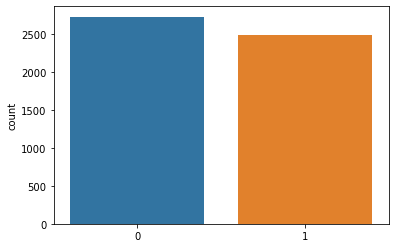

In [33]:
sns.countplot(y_pred.reshape(-1))

In [41]:
df_test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...


In [42]:
submission = pd.DataFrame({"ID":df_test["id"], "Label":y_pred.reshape(-1)})

In [43]:
submission.head()

,ID,Label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,1


# Summary

The fake news dataset is a dataset that features columns such as id, news headline, news content, and 1/0 label, number 1 for untrustworthy news category & number 0 for trustworthy news category. Generally, a mass media / publisher that uploads fake news has news content that is shorter than the original news, then the second factor is that fake news is dominated by news headlines that carry politics, vandalism, and an opposition state.

Referring to the fake news dataset, the training dataset has a target number of labels 1 & 0 not too far away, for label 1 (identified as fake news) worth 50.06% and the rest for target label 0. Fake news is usually brought by an author who does not have a name / blank. Based on this insight, I used the Id, news headline, author, and news content as variable X. For variable Y (target) I used column label.

using the LSTM deep learning model, as well as several data preparation steps such as changing Nan values ​​in data, removing all stop words, changing letters in all text to lowercase, applying one hot encoding to titles & vocab size, and finally padding features that have passed. one hot encoder feature. The final accuracy result is 97%, with batch_size parameter of 64, epochs of 10, Adam's optimizer, and the loss value used is binary_cross entropy.

# Difficulty experienced

The difficulty that was obtained while working on this task was about the limited column features that could be used so that the data insight report was minimal.

# Improvisation & Future Research

Although there are limited columns that can be analyzed, I can apply several visualizations such as target label representation, author on fake news & not, wordcloud from the most common words appearing in the dataset, and index visualization that contains the most values. 

My hope is that for future research, the data collected can be more varied such as the addition of a column on the publication date, the number of comments & likes on each news, and readers 'comments on the news so that news that is categorized as fake news can provide a more rational statement because it takes readers' comments into account. the news too.